<a href="https://colab.research.google.com/github/wanasyraf4/Machine-Learning/blob/main/3D_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D


In [10]:

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

print(f"X Train:\n{X_train}")
print(f"Y Train:\n{y_train}")
print(f"X test:\n{X_test}")
print(f"Y test:\n{y_test}")


X Train:
[[54.90096708 22.43769908]
 [45.37445182 33.54584051]
 [26.39303134 32.95340479]
 ...
 [56.65545378 19.38900416]
 [23.9175693  30.99700203]
 [ 4.35682767 45.17848049]]
Y Train:
[3.51756653e+03 3.18416429e+03 1.78251899e+03 2.74656778e+03
 2.16538745e+03 4.65590643e+03 3.17603768e+03 3.72401781e+03
 2.89362202e+03 1.71973934e+03 1.93860401e+03 5.58934328e+02
 5.45585516e+03 2.09308369e+03 2.96170431e+03 1.35322869e+03
 4.34108758e+03 3.22991433e+03 1.35994077e+03 2.55631386e+03
 4.18026620e+03 6.45967291e+03 1.50566252e+03 3.09887669e+03
 4.58897579e+03 1.76105076e+03 3.89440147e+03 3.71059914e+03
 1.59821511e+02 3.46053848e+03 3.39987101e+03 1.22575374e+03
 3.42368487e+03 2.54957974e+03 1.98494727e+03 2.46614587e+03
 8.79889645e+02 5.76452841e+02 1.96762542e+03 1.66326806e+02
 2.70067791e+03 3.51964750e+03 5.79290808e+03 2.47821494e+02
 5.97100986e+03 3.83488261e+03 1.44207912e+03 4.73680580e+01
 1.00479922e+03 4.23819271e+03 5.00861915e+03 3.03208496e+03
 1.13273349e+03 4.136

Text(0.5, 0, 'y')

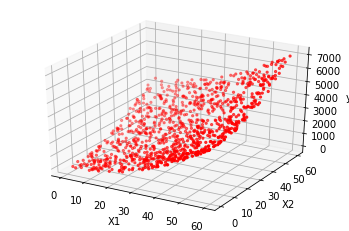

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")



In [12]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"model:\n{model}")
print(f"prediction on y:\n{y_pred}")
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))



model:
LinearRegression()
prediction on y:
[3309.29769185 2395.55142858 2568.70750804 3789.43821976 2395.72123163
 2639.36948759 4946.99522752 4326.72536488 3062.43464275 4012.95176971
 3133.24720181 4077.6999726  5239.16249862 1374.52582439 2010.5848341
 2853.55065228 1526.28141449 1861.57219553 3779.46831693 5487.14496629
 2647.90322882 2483.90701503 5311.67951733 2836.25396377 4361.42038542
 3015.04326012 3664.02913475 1357.77301091 2888.55680918 1527.05700232
 1337.44525355 1410.68768798 1605.90665947 1917.40702034 1843.01294044
 2526.95344156 1928.72593801 1544.4948789   939.86011204 3106.809605
 -230.33333708 3721.39388201  355.51978863 4400.91592762 3506.05003021
 1985.83376707 2782.85178576 5747.13064105 -594.26082452 5183.06055447
 3716.57320882  229.9574226   870.37300493  816.3997135   408.86637529
 1360.16076634 5182.71478601 1125.65763263 3109.47402862 2817.20668286
 -458.1902243  4314.50964889 1453.92908128 4551.80002063 4175.22626384
 4517.36954437 2314.24056856 3770.275

In [14]:
coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))



Equation: y = -1275.33 + 61.76x1 + 60.24x2


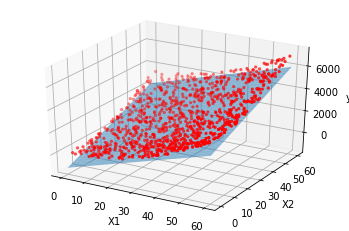

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()